# Multiple Linear Regression

Multiple linear regression is just like Linear regression instead of just one feature (x), we have multiple features (X1, X2, ..., Xn). So it's becomes:

y = w1.X1+w2.X2+.....+wn.Xn+b

Where:
- \( y \) is the output or prediction.
- \( X1, X2, ....., Xn \) are the input features.
- \( w1, w2, ....., wn \) are the weights corresponding to each feature.
- \( b \) is the bias term.

The goal remains the same: to find the optimal values of \( w1, w2, ..., wn \) and \( b \) that minimize the error between the predicted output and the actual output in the training data.

In [7]:
import numpy as np # Importing numpy library

class MultipleLinearRegression:   # Define a class for Multiple Linear Regression
    def __init__(self, learning_rate=1.0e-2, epochs=1000): # Constructor with default hyperparameters
        self.learning_rate = learning_rate # Set learning rate
        self.epochs = epochs # Set number of epochs
        self.weights = None # Weights initialized to None because they depend on the data 
        self.bias = None
   
    # In the fit method, we are provided with data and their associated values. X is for input features and y for target values.
    # We can now use these to initialize our weights and then train the model to find optimal weights.
    def fit(self, X, y): # Loop runs for the specified number of epochs.

        num_samples, num_features = X.shape
        self.weights = np.random.rand(num_features) # We initialize the weights randomly based on the number of features in the input data X.
        self.bias = 0
        
        for i in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias # We compute the predicted values using the dot product of input features (X) and weights, and then add the bias.
            # Calculates the gradients of the loss function with respect to the weights (dw) and bias (db) using the derivative of the mean squared error loss function.
            dw = (1 / num_samples) * np.dot(X.T, y_predicted - y)
            db = (1 / num_samples) * np.sum(y_predicted - y)
            # Updates the weights and bias using gradient descent, where the learning rate (self.learning_rate) controls the step size in the update rule.
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    # Make predictions using the trained model. It takes input features X and returns the predicted target values.
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [8]:
if __name__ == "__main__":

    # Generating random data for demonstration
    X = 2 * np.random.rand(100, 4)  # Generate random input features with four features
    y = 4 + 3 * X[:,0] + 5 * X[:,1] - 2 * X[:,2] + 7 * X[:,3] + np.random.randn(100)  # Generate target values with some random noise

    # Creating an instance of the MultipleLinearRegression class
    model = MultipleLinearRegression()  # Create an object of the MultipleLinearRegression class

    # Training the model
    model.fit(X, y)  # Train the model using the input features (X) and target values (y)

    # Making predictions
    predictions = model.predict(X)  # Use the trained model to make predictions on the input features (X)


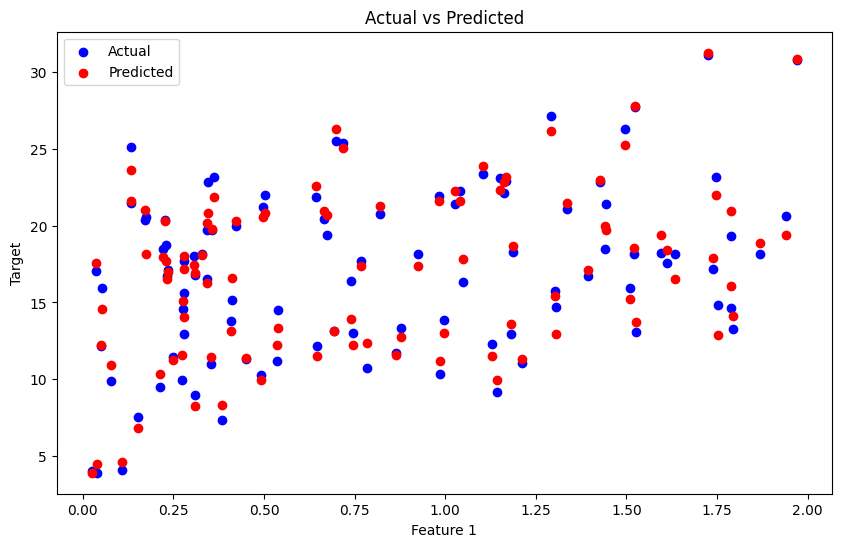

In [9]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values on a single 2D scatter plot
plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(X[:,0], y, color='blue', label='Actual')

# Plot predicted data
plt.scatter(X[:,0], predictions, color='red', label='Predicted')

plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


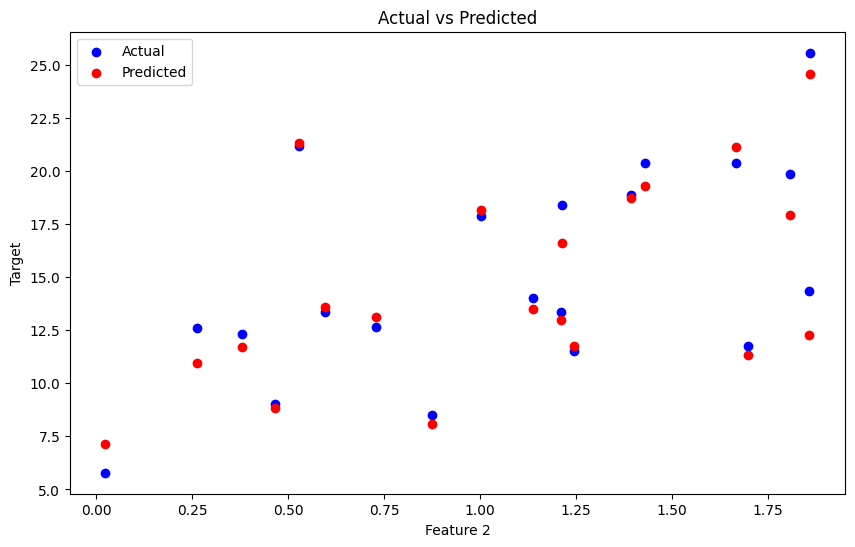

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating random data for demonstration
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 4)  # Generate random input features with four features
y = 4 + 3 * X[:,0] + 5 * X[:,1] - 2 * X[:,2] + 7 * X[:,3] + np.random.randn(100)  # Generate target values with some random noise

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')

# Plot predicted data
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')

plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
